FETCHING THE "MNIST" DATASET

In [1]:
from sklearn.datasets import fetch_openml


In [2]:
mnist = fetch_openml("mnist_784")

In [3]:
mnist

{'DESCR': "**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered i

In [4]:
x , y = mnist["data"] , mnist["target"]

In [5]:
x.shape

(70000, 784)

In [6]:
y.shape

(70000,)

In [7]:
y[69852]

'7'

In [8]:
%matplotlib inline
import matplotlib

In [9]:
import matplotlib.pyplot as plt


In [10]:
random_digit = x[25000]

LET'S RESHAPE THE RANDOM DIGIT AS A 28 BY 28 ARRAY IN ORDER TO PLOT IT

In [11]:
random_digit_image = random_digit.reshape(28,28)

(-0.5, 27.5, 27.5, -0.5)

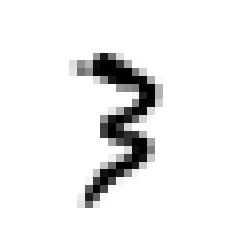

In [12]:
plt.imshow(random_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest" )
plt.axis("off")

In [13]:
y[25000]

'3'

SPLITTING THE DATASET INTO "TRAINING" AND "TESTING" SETS.

In [14]:
x_train , x_test = x[:60000], x[60000:]

In [15]:
y_train , y_test = y[:60000], y[60000:]

NOW WE SHUFFLE THE DATASET TO ENSURE THAT EACH DATA POINT CREATES AN "INDEPENDENT" CHANGE ON THE MODEL, WITHOUT BEING BIASED BY THE SAME POINTS BEFORE THEM.

In [16]:
import numpy as np
shuffle_index = np.random.permutation(60000)
x_train , y_train = x_train[shuffle_index] , y_train[shuffle_index]

**TRAINING OUR CLASSIFICATION ML MODEL**

**Model 1. Logistic Regression**

In [17]:
from sklearn.linear_model import LogisticRegression

lmodel = LogisticRegression()
lmodel.fit(x_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
lmodel.predict([x[25000]])

array(['3'], dtype=object)

In [19]:
lmodel.predict([x[69852]])

array(['7'], dtype=object)

**CALCULATING THE ACCURACY SCORE OF OUR MODEL**

In [20]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(y_train,lmodel.predict(x_train)))
print(accuracy_score(y_test,lmodel.predict(x_test)))

0.9339166666666666
0.9255


In [21]:
print(confusion_matrix(y_train,lmodel.predict(x_train)))
print(confusion_matrix(y_test,lmodel.predict(x_test)))

[[5764    0   15    9   14   36   33   10   38    4]
 [   1 6584   32   19    6   20    3   10   55   12]
 [  28   47 5445   89   61   20   56   51  140   21]
 [  17   23  118 5582    6  162   14   50  119   40]
 [  13   22   23    9 5491    8   48   15   42  171]
 [  57   18   40  161   48 4793   82   15  160   47]
 [  34    9   40    0   35   58 5713    4   21    4]
 [  11   20   58   28   42    8    4 5896   20  178]
 [  27   93   55  122   19  136   36   18 5293   52]
 [  21   22   14   70  129   33    3  138   45 5474]]
[[ 963    0    0    3    1    3    4    4    2    0]
 [   0 1112    4    2    0    1    3    2   11    0]
 [   3   10  926   15    6    4   15    8   42    3]
 [   4    1   21  916    1   26    3    9   22    7]
 [   1    1    7    3  910    0    9    7   10   34]
 [  11    2    1   33   11  776   11    6   35    6]
 [   9    3    7    3    7   16  910    2    1    0]
 [   1    6   24    5    7    1    0  951    3   30]
 [   8    7    6   23    6   26   10   10  86

**Creating a "5" Detector**

In [22]:
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_5 = (y_train==5)
y_test_5 = (y_test==5)

In [24]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(tol = 0.1, solver='lbfgs')
clf.fit(x_train, y_train_5)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.1, verbose=0,
                   warm_start=False)

In [25]:
clf.predict([random_digit])

array([False])

In [27]:
from sklearn.model_selection import cross_val_score
a = cross_val_score(clf, x_train, y_train_5, cv=3, scoring="accuracy")
a.mean()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.97385